###  Created by Luis A. Sanchez-Perez (alejand@umich.edu)

### Bayesian Decision Theory
Statistical approach to classification (formalization of common-sense procedures)

Lets load the Fisher Iris dataset to perform some analysis

In [1]:
from sklearn import datasets

In [2]:
iris = datasets.load_iris()
type(iris)

sklearn.utils.Bunch

In [3]:
iris.feature_names # predictors

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
iris.target_names # responses

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
type(iris.data)

numpy.ndarray

In [6]:
iris.data[:5,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [7]:
type(iris.target)

numpy.ndarray

In [8]:
iris.target[:5]

array([0, 0, 0, 0, 0])

In [9]:
import pandas as pd

In [10]:
dataset = pd.DataFrame(data=iris.data,columns=iris.feature_names)
dataset['type'] = iris.target_names[iris.target]
dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [11]:
import seaborn as sns

In [12]:
is_setosa = dataset['type'] == 'setosa'
is_versicolor = dataset['type'] == 'versicolor'
is_virginica = dataset['type'] == 'virginica'

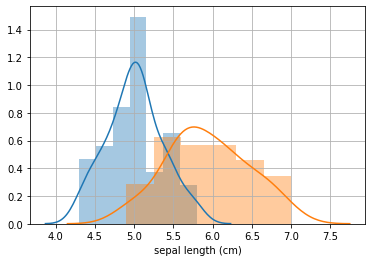

In [13]:
sns.distplot(dataset.loc[is_setosa,'sepal length (cm)']).grid()
sns.distplot(dataset.loc[is_versicolor,'sepal length (cm)'])

### Initial approach to make decisions
Use only the prior probabilities and decide always for the highest prio class (**not too clever!!**)

In [14]:
priors = {
    'setosa': 0.5,
    'versicolor': 0.1,
    'virginica': 0.4
}
priors

{'setosa': 0.5, 'versicolor': 0.1, 'virginica': 0.4}

### Building likelihood of observing a feature per class

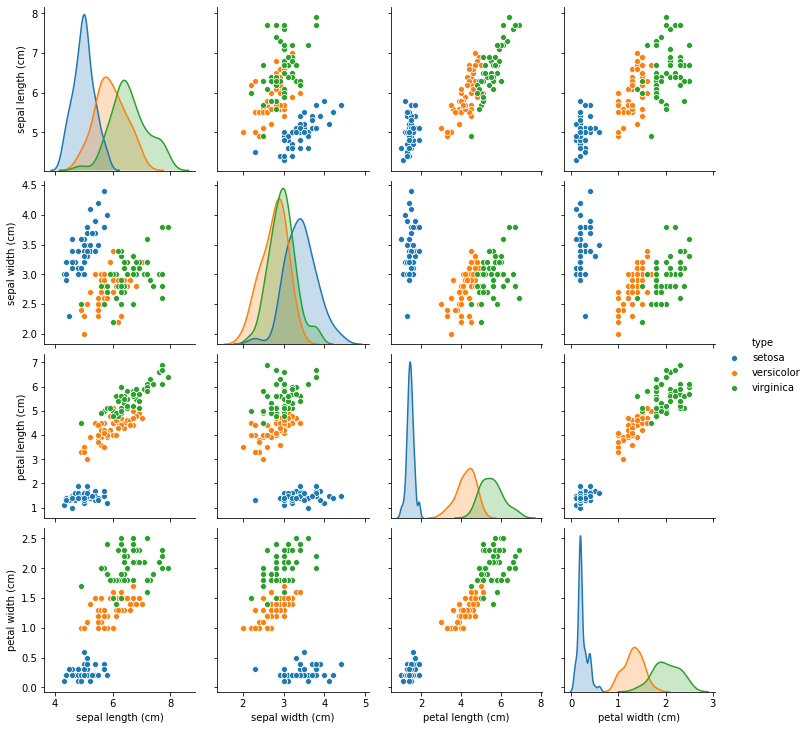

In [15]:
sns.pairplot(dataset,hue='type')

In [16]:
column = 'petal width (cm)'

In [17]:
setosa_data = dataset.loc[is_setosa,column]
versicolor_data = dataset.loc[is_versicolor,column]
virginica_data = dataset.loc[is_virginica,column]

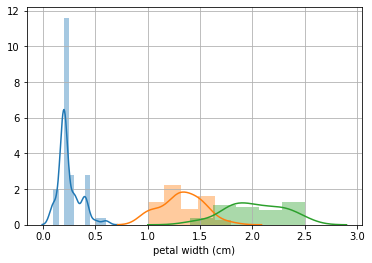

In [18]:
sns.distplot(setosa_data).grid()
sns.distplot(versicolor_data)
sns.distplot(virginica_data)

In [19]:
from scipy.stats import gaussian_kde

In [20]:
kernel_dist = {
    'setosa': gaussian_kde(setosa_data),
    'versicolor': gaussian_kde(versicolor_data),
    'virginica': gaussian_kde(virginica_data)    
}
kernel_dist

{'setosa': <scipy.stats.kde.gaussian_kde at 0x1e171a92cc8>,
 'versicolor': <scipy.stats.kde.gaussian_kde at 0x1e171a80108>,
 'virginica': <scipy.stats.kde.gaussian_kde at 0x1e171a92e88>}

In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
x = np.linspace(0,3,100)

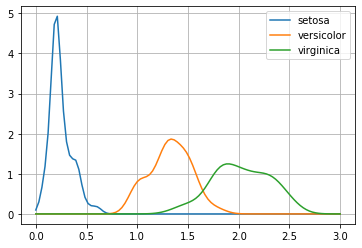

In [23]:
for dist in kernel_dist.values():
    y = dist.pdf(x,)
    plt.plot(x,y)
plt.grid()
plt.legend(kernel_dist.keys())

In [24]:
point = 1.8

In [25]:
for key, dist in kernel_dist.items():
    print('{}:'.format(key),'%.2lf' % dist.pdf(point))

setosa: 0.00
versicolor: 0.16
virginica: 1.13


In [26]:
from scipy.stats import norm

In [27]:
normal_dist = {
    'setosa': norm(setosa_data.mean(), setosa_data.std()),
    'versicolor': norm(versicolor_data.mean(), versicolor_data.std()),
    'virginica': norm(virginica_data.mean(), virginica_data.std()),
}
normal_dist

{'setosa': <scipy.stats._distn_infrastructure.rv_frozen at 0x1e171ad8448>,
 'versicolor': <scipy.stats._distn_infrastructure.rv_frozen at 0x1e1708ec8c8>,
 'virginica': <scipy.stats._distn_infrastructure.rv_frozen at 0x1e171b22ec8>}

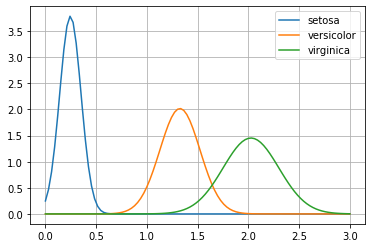

In [28]:
for dist in normal_dist.values():
    y = dist.pdf(x)
    plt.plot(x,y)
plt.grid()
plt.legend(normal_dist.keys())

In [29]:
for key, dist in normal_dist.items():
    print('{}:'.format(key),'%.2lf' % dist.pdf(point))

setosa: 0.00
versicolor: 0.11
virginica: 1.04


### Using likelihood and prior knowledge to make decisions

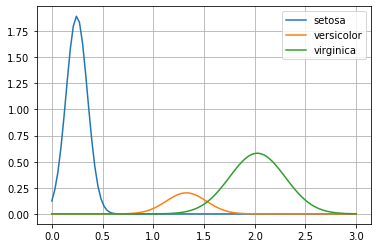

In [30]:
px = 0
for key, likelihood, prior in zip(priors.keys(), normal_dist.values(), priors.values()):
    y = likelihood.pdf(x) * prior
    px += y
    plt.plot(x,y)
plt.grid()
plt.legend(priors.keys())

In [31]:
px = 0
pxypy = []
for likelihood, prior in zip(kernel_dist.values(), priors.values()):
    value = likelihood.pdf(point) * prior
    pxypy.append(value)
    px += value
print('Unnormalized results (Not a probability):')
for key,value in zip(priors.keys(), pxypy):
    print('{}:'.format(key),'%.2lf' % value)
print('\nNormalized results (Actual probability):')
for key,value in zip(normal_dist.keys(), (pxypy/px)):
    print('{}:'.format(key),'%.2lf' % value)

Unnormalized results (Not a probability):
setosa: 0.00
versicolor: 0.02
virginica: 0.45

Normalized results (Actual probability):
setosa: 0.00
versicolor: 0.03
virginica: 0.97
